1. Loading dependencies.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import sys





2. Summary Statistics & Missing-Value Report

In [51]:
df = pd.read_csv("..\\data\\benin-malanville.csv")
# 1. Summary statistics for all numeric columns
numeric_summary = df.describe()

# 2. Count of missing values in each column
missing_counts = df.isna().sum()

# 3. Identifying columns with >5% missing values
threshold = 0.05 * len(df)
high_na_columns = missing_counts[missing_counts > threshold].index.tolist()

# Printing the results
print("Summary Statistics (Numeric Columns):\n", numeric_summary)
print("\nMissing Value Counts:\n", missing_counts)
print("\nColumns with >5% Missing Values:\n", high_na_columns)


Summary Statistics (Numeric Columns):
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.0000

3. Outlier Detection & Basic Cleaning

In [52]:
# Checking for missing values in key columns
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
missing_counts = df[key_columns].isna().sum()
print("Missing Values:\n", missing_counts)




Missing Values:
 GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [53]:
# Compute Z-scores for the selected columns
z_scores = df[key_columns].apply(stats.zscore)

# Identify rows with |Z| > 3
outlier_mask = (np.abs(z_scores) > 3).any(axis=1)
outlier_count = outlier_mask.sum()
print(f"\nTotal Outlier Rows: {outlier_count}")

# Drop outliers
df_cleaned = df[~outlier_mask].copy()


Total Outlier Rows: 7740


In [54]:
# Fill missing values with median
df_cleaned[key_columns] = df_cleaned[key_columns].fillna(df_cleaned[key_columns].median())

# Verify if all missing values are handled
print("\nRemaining Missing Values:\n", df_cleaned[key_columns].isna().sum())



Remaining Missing Values:
 GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [55]:
output_path = f"..\\data\\benin_clean.csv"

# Ensure 'data/' directory exists
os.makedirs('data', exist_ok=True)

# Export cleaned data
df_cleaned.to_csv(output_path, index=False)
print(f"\nCleaned data exported to: {output_path}")



Cleaned data exported to: ..\data\benin_clean.csv


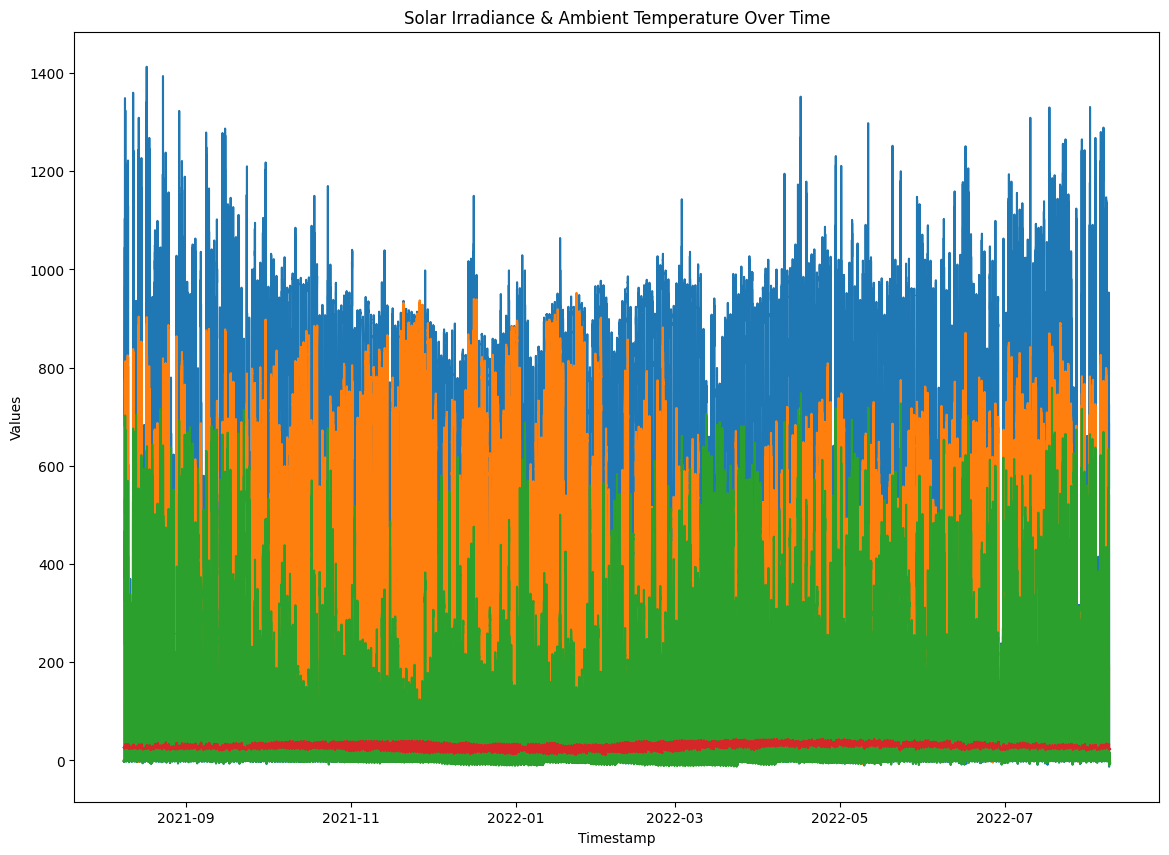

In [56]:
# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Optionally set as index for easier plotting
df.set_index('Timestamp', inplace=True)

plt.figure(figsize=(14, 10))

# Plot each variable
plt.plot(df.index, df['GHI'], label='GHI')
plt.plot(df.index, df['DNI'], label='DNI')
plt.plot(df.index, df['DHI'], label='DHI')
plt.plot(df.index, df['Tamb'], label='Tamb')

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Solar Irradiance & Ambient Temperature Over Time')
#plt.legend()
plt.show()



C:\Users\Mulat Yazew\AppData\Local\Temp\ipykernel_11196\3478173750.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()


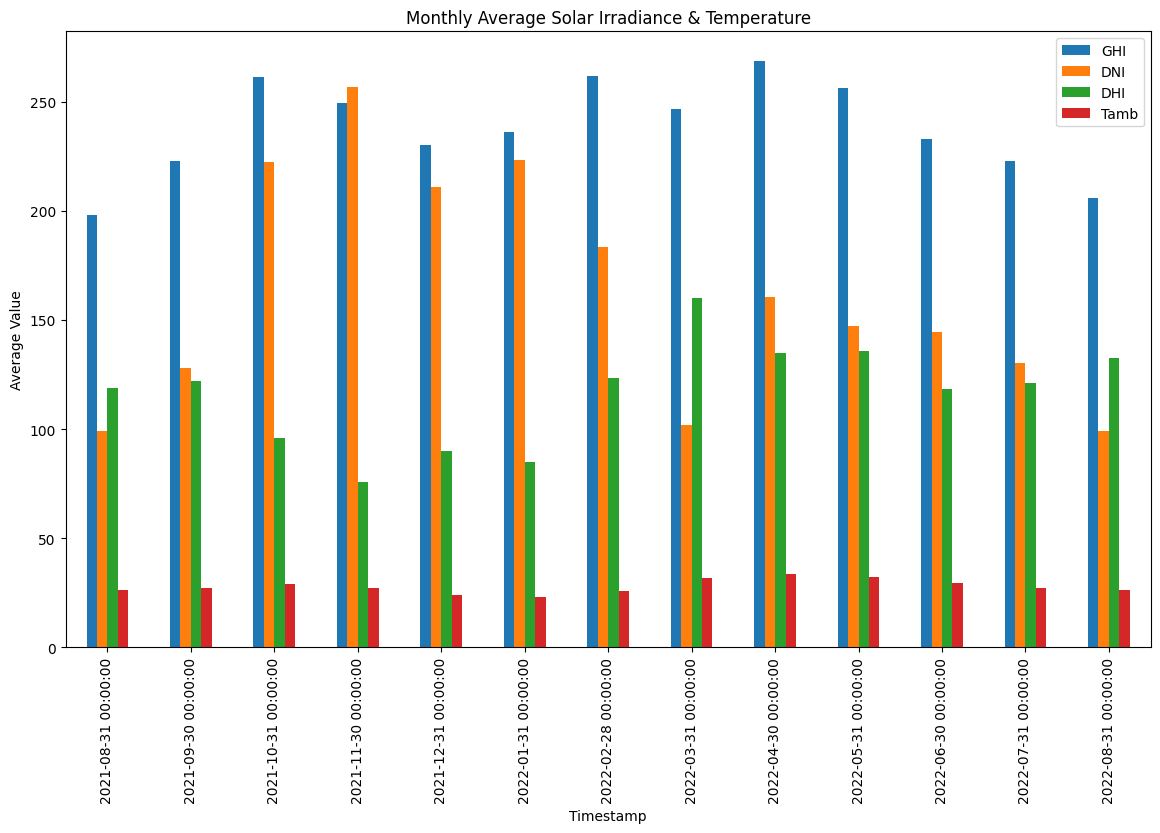

In [57]:
# Monthly average values
monthly_avg = df.resample('M').mean()

monthly_avg[['GHI', 'DNI', 'DHI', 'Tamb']].plot(kind='bar', figsize=(14, 8))
plt.title('Monthly Average Solar Irradiance & Temperature')
plt.ylabel('Average Value')
plt.show()


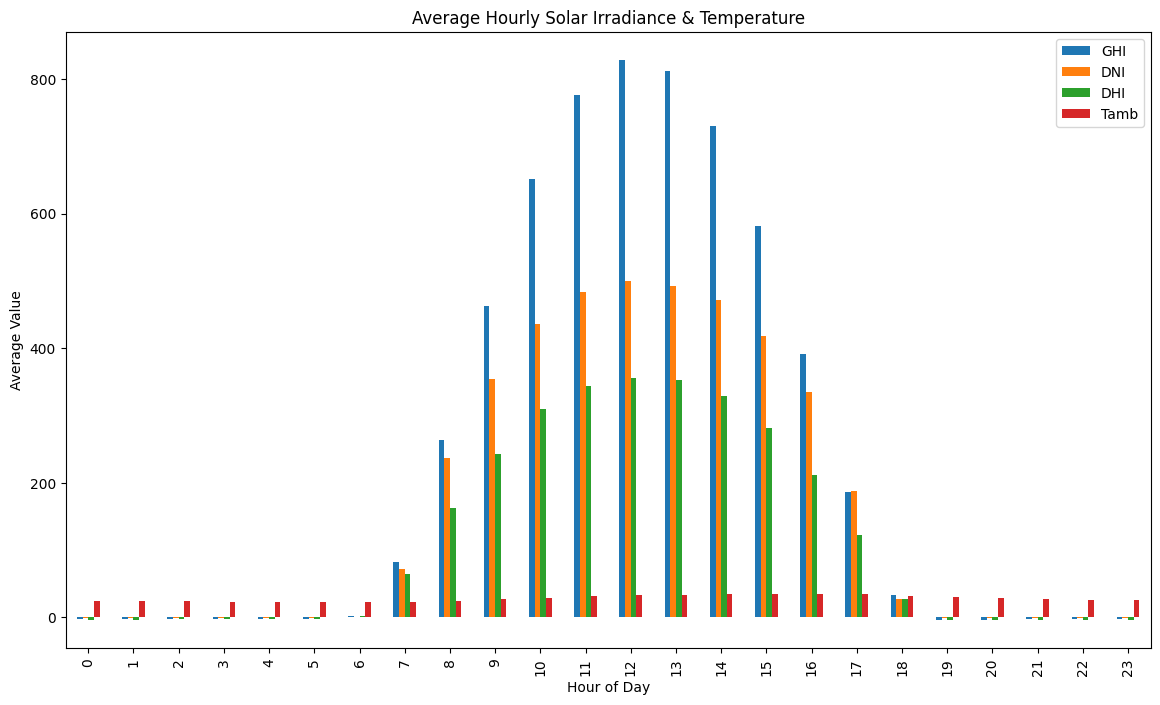

In [58]:
# Hourly average (aggregated across all days)
hourly_avg = df.groupby(df.index.hour).mean()

hourly_avg[['GHI', 'DNI', 'DHI', 'Tamb']].plot(kind='bar', figsize=(14, 8))
plt.title('Average Hourly Solar Irradiance & Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.show()
